# FIAP IA para Dev
## Tech Challenge Fase 01 - Análise e Processamento


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [6]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/lung_cancer_prediction_dataset.csv')
print("Dataset Sample Data:")
df.head()

Dataset Sample Data:


,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 n

In [ ]:
print("Dataset Description:")
display(df.describe())

In [ ]:
null_count = df.isnull().sum()
print(f"Null Values Count: {null_count}")

### Colunas Importantes
- Lung_Cancer_Diagnosis 

### Colunas Desnecessárias
- ID

### Colunas Nulas
- Cancer_Stage
- Treatment_Type

### Colunas Catégoricas

### Colunas Númericas

In [7]:
display(set(df['Lung_Cancer_Diagnosis']))

{'No', 'Yes'}

<Axes: ylabel='Lung_Cancer_Diagnosis'>

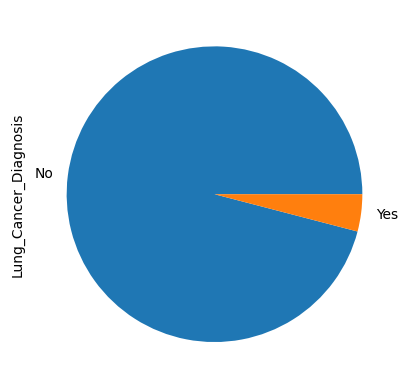

In [ ]:
# Pessoas diagnosticadas com câncer de pulmão
df['Lung_Cancer_Diagnosis'].groupby(df['Lung_Cancer_Diagnosis']).count().plot(kind='pie')

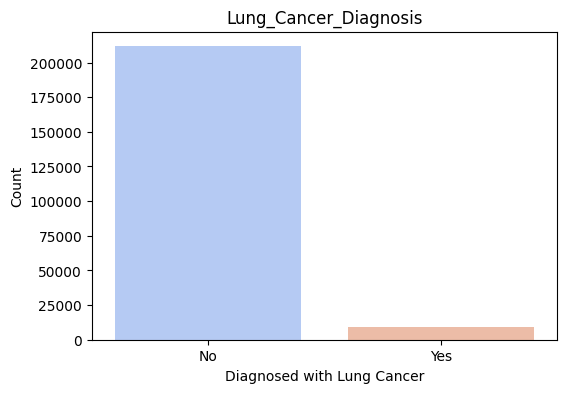

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Lung_Cancer_Diagnosis", data=df, palette="coolwarm", hue="Lung_Cancer_Diagnosis")
plt.title("Lung_Cancer_Diagnosis")
plt.xlabel("Diagnosed with Lung Cancer")
plt.ylabel("Count")
plt.show()

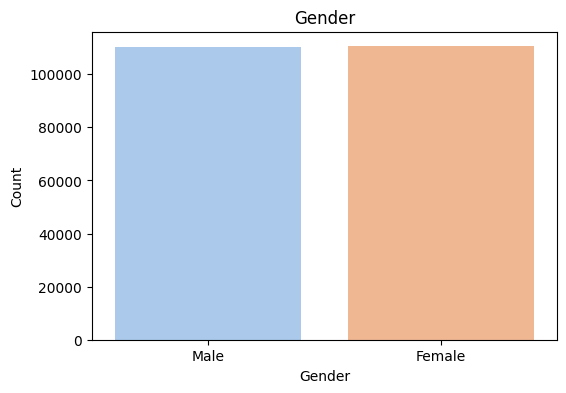

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="pastel", hue="Gender")
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Smoker'>

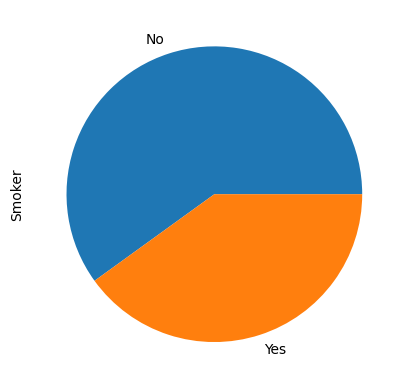

In [14]:
# Pessoas fumantes
df['Smoker'].groupby(df['Smoker']).count().plot(kind='pie')

<Axes: xlabel='Age', ylabel='Count'>

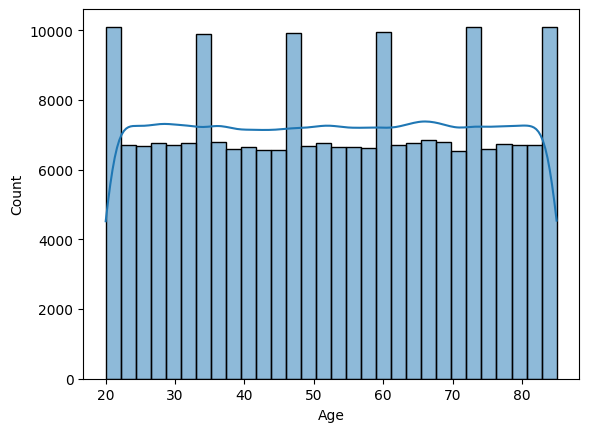

In [25]:
sb.histplot(data=df, x="Age", bins=30, kde=True)

<Axes: xlabel='Smoker', ylabel='count'>

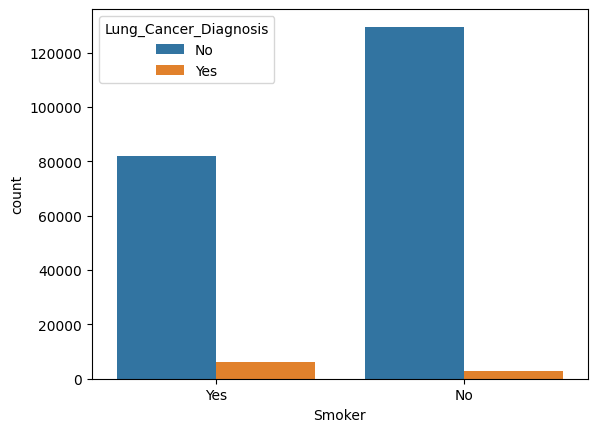

In [26]:
sns.countplot(x='Smoker', hue='Lung_Cancer_Diagnosis', data=df)

<Axes: xlabel='Gender', ylabel='count'>

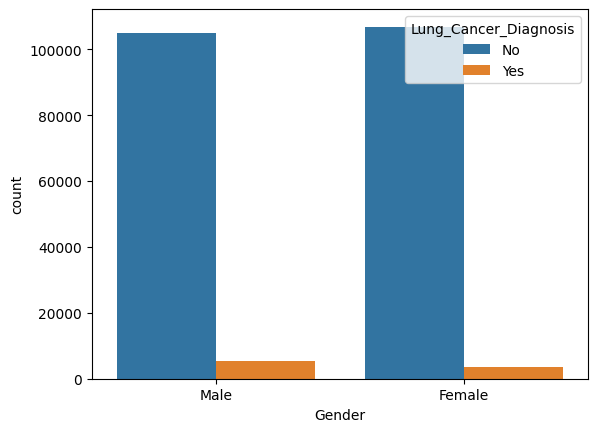

In [27]:
sns.countplot(x='Gender', hue='Lung_Cancer_Diagnosis', data=df)

<Axes: >

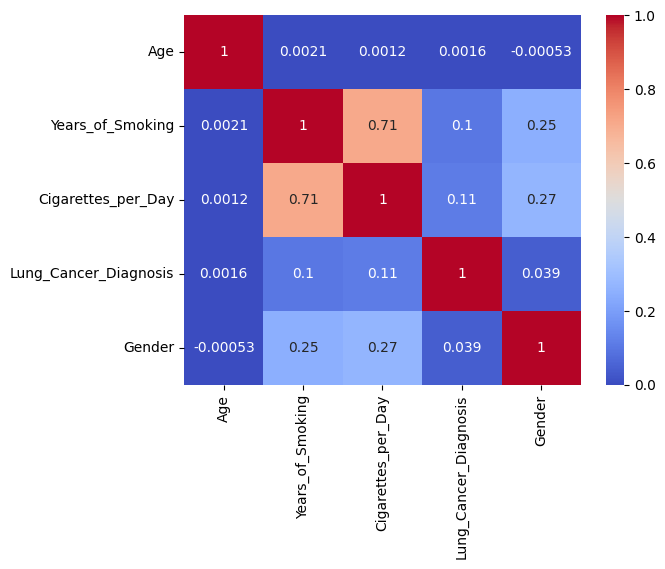

In [33]:
from sklearn.preprocessing import LabelEncoder

df['Lung_Cancer_Diagnosis'] = LabelEncoder().fit_transform(df['Lung_Cancer_Diagnosis'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
 
corr_matrix = df[['Age', 'Years_of_Smoking', 'Cigarettes_per_Day', 
                 'Lung_Cancer_Diagnosis', 'Gender']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')